# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key 
weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | monrovia
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | tsiombe
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | ambon
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | chonchi
Processing Record 13 of Set 1 | saipan
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | minas de marcona
Processing Record 16 of Set 1 | bengkulu
Processing Record 17 of Set 1 | lata
Processing Record 18 of Set 1 | pericos
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1 | udachny
Processing Record 22 of Set 1 | lepsy
Processing Record 23 of Set 1 | iqaluit
Proc

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,monrovia,6.3005,-10.7969,26.67,89,9,1.30,LR,1709080541
1,port-aux-francais,-49.3500,70.2167,9.03,96,100,10.68,TF,1709080529
2,bredasdorp,-34.5322,20.0403,17.22,75,0,6.65,ZA,1709080541
3,blackmans bay,-43.0167,147.3167,24.74,50,56,2.37,AU,1709080541
4,tsiombe,-25.3000,45.4833,25.30,84,2,0.30,MG,1709080542


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,monrovia,6.3005,-10.7969,26.67,89,9,1.30,LR,1709080541
1,port-aux-francais,-49.3500,70.2167,9.03,96,100,10.68,TF,1709080529
2,bredasdorp,-34.5322,20.0403,17.22,75,0,6.65,ZA,1709080541
3,blackmans bay,-43.0167,147.3167,24.74,50,56,2.37,AU,1709080541
4,tsiombe,-25.3000,45.4833,25.30,84,2,0.30,MG,1709080542


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

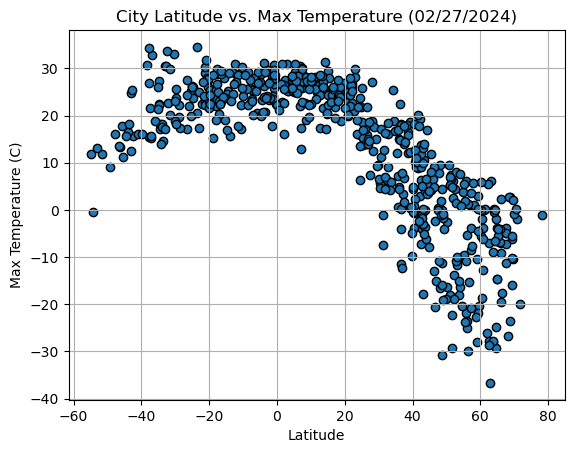

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (02/27/2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

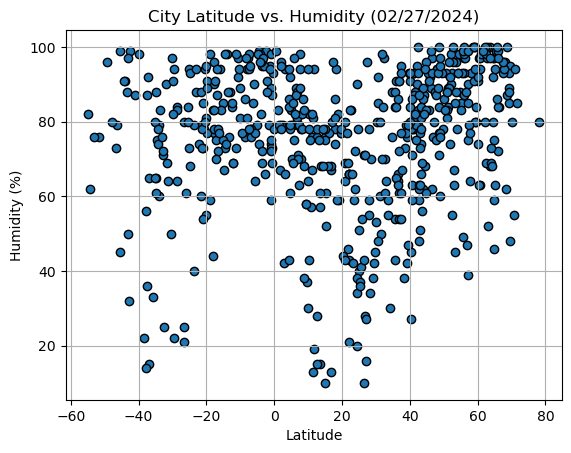

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (02/27/2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

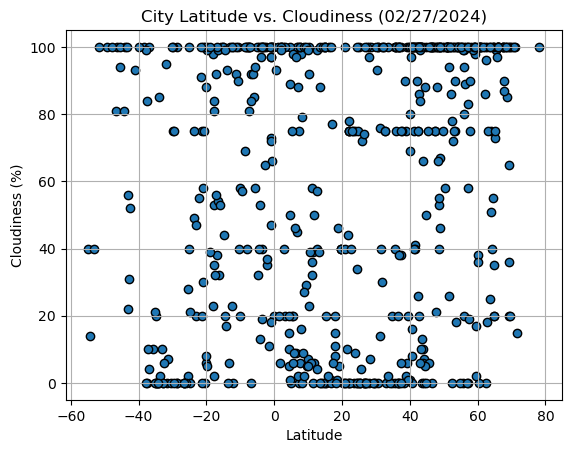

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (02/27/2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

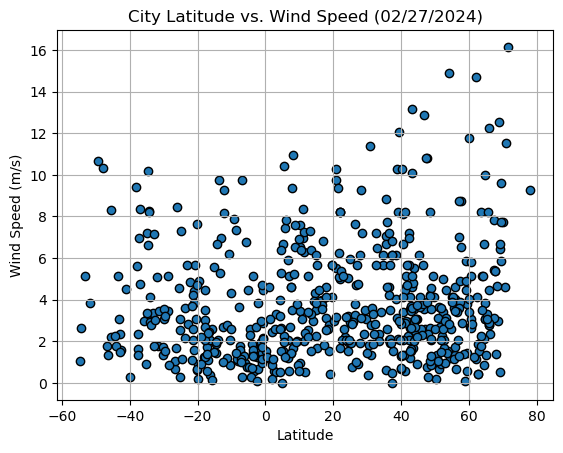

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (02/27/2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression analysis
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Create a regression line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot the scatter plot
    plt.scatter(x_values,y_values)
    # Plot the regression line
    plt.plot(x_values, slope*x_values + intercept, "r", alpha=0.75)
    # Annotate the linear regression equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # Print the r-squared value
    print(f"The r-squared is: {r_value**2:.2f}")
    # Display the plot
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,monrovia,6.3005,-10.7969,26.67,89,9,1.30,LR,1709080541
12,saipan,15.1355,145.7010,29.39,61,20,5.66,MP,1709080544
13,college,64.8569,-147.8028,-14.56,46,20,3.09,US,1709080544
16,lata,40.1629,-8.3327,4.40,91,1,1.27,PT,1709080545
17,pericos,25.0500,-107.7000,25.95,40,100,2.95,MX,1709080545


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,9.03,96,100,10.68,TF,1709080529
2,bredasdorp,-34.5322,20.0403,17.22,75,0,6.65,ZA,1709080541
3,blackmans bay,-43.0167,147.3167,24.74,50,56,2.37,AU,1709080541
4,tsiombe,-25.3000,45.4833,25.30,84,2,0.30,MG,1709080542
5,carnarvon,-24.8667,113.6333,26.01,68,0,7.28,AU,1709080542


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.70


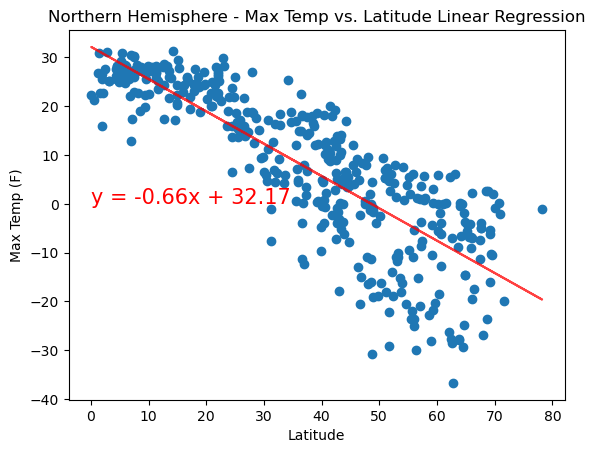

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", "Latitude", "Max Temp (F)", (0,0))

The r-squared is: 0.26


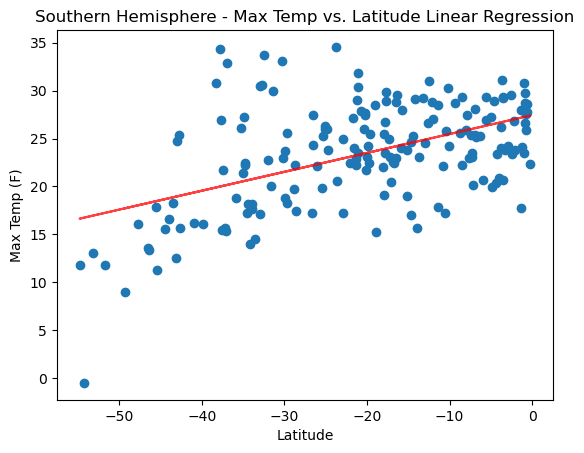

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", "Latitude", "Max Temp (F)", (-50,90))

**Discussion about the linear relationship:** we can see the differences between the Temperature vs. Latitude Linear Regression Plot but also the relationship between the Temperature and the latitude between the southern and northern. we notice how different they are but the same how one cant live with out the other. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.10


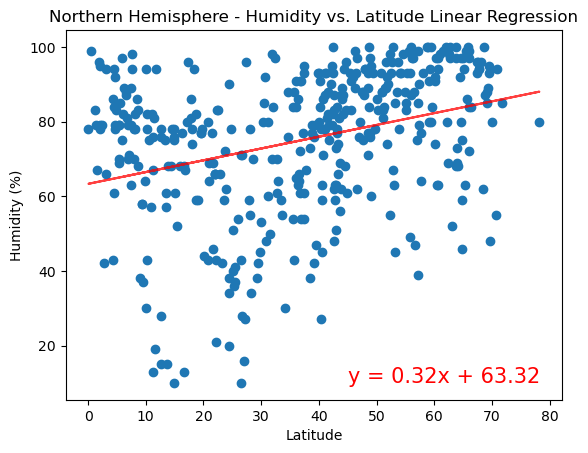

In [24]:
# Northern Hemisphere
# Define x and y values for linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Northern Hemisphere - Humidity vs. Latitude Linear Regression", "Latitude", "Humidity (%)", (45,10))

The r-squared is: 0.09


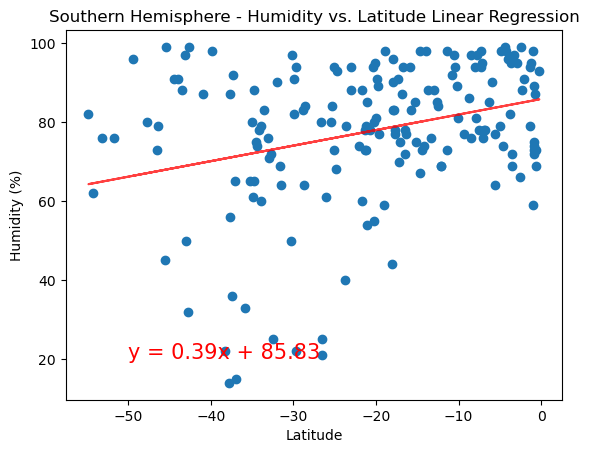

In [25]:
# Southern Hemisphere
# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Southern Hemisphere - Humidity vs. Latitude Linear Regression", "Latitude", "Humidity (%)", (-50,20))

**Discussion about the linear relationship:**  we can see the differences between Humidity vs. Latitude Linear Regression Plot but also the relationship between the Humidity and the latitude between the southern and northern. we notice how different they are but the same how one cant live with out the other. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.10


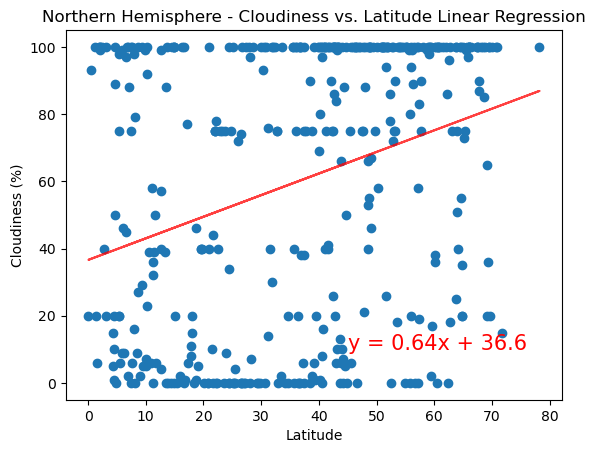

In [26]:
# Northern Hemisphere
# Define x and y values for linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", "Latitude", "Cloudiness (%)", (45,10))

The r-value is: 0.02056735429994368


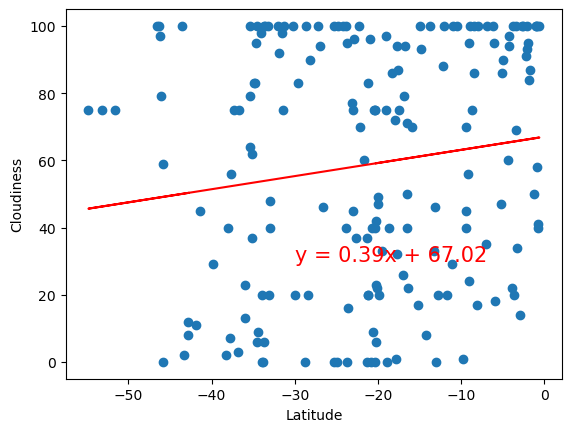

In [20]:
# Southern Hemisphere
# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", "Latitude", "Cloudiness (%)", (-50,20))

**Discussion about the linear relationship:**  we can see the differences between Cloudiness vs. Latitude Linear Regression Plot but also the relationship between the Cloudiness and the latitude between the southern and northern. we notice how different they are but the same how one cant live with out the other. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


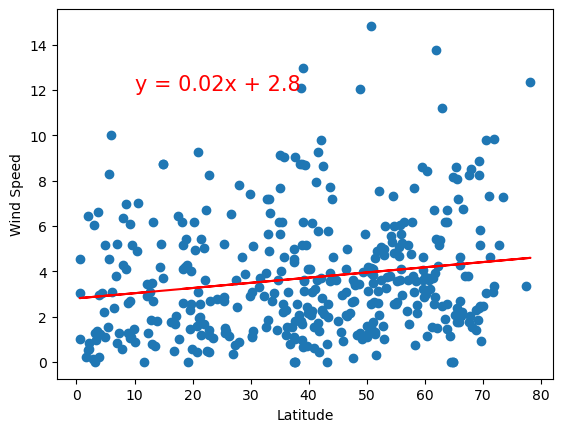

In [21]:
# Northern Hemisphere
# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", "Latitude", "Cloudiness (%)", (-50,20))

The r-squared is: 0.07


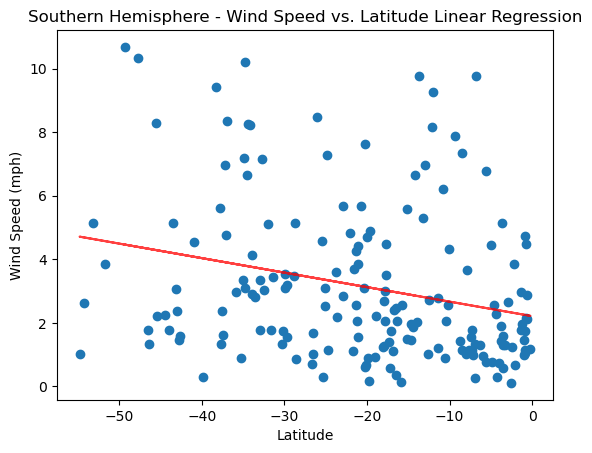

In [28]:
# Southern Hemisphere
# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", "Latitude", "Wind Speed (mph)", (-50,30))


**Discussion about the linear relationship:** we can see the differences between Wind Speed vs. Latitude Linear Regression Plot but also the relationship between the Wind Speed and the latitude between the southern and northern. we notice how different they are but the same how one cant live with out the other. 